In [7]:
!nvidia-smi

Mon Dec  2 16:53:53 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.72                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8              7W /   55W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
import os
HOME = os.getcwd()
print(HOME)

/home/rishit/MajorProject/AI-Based-Road-Inspection-System/src/results/YOLOv8


**Installing Yolo v8**

In [9]:
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.39 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Setup complete ✅ (20 CPUs, 7.6 GB RAM, 77.1/1006.9 GB disk)

OS                  Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39
Environment         Linux
Python              3.12.3
Install             git
RAM                 7.59 GB
Disk                77.1/1006.9 GB
CPU                 12th Gen Intel Core(TM) i7-12700H
CPU count           20
GPU                 NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB
GPU count           1
CUDA                12.4

numpy               ✅ 2.1.3>=1.23.0
numpy               ✅ 2.1.3<2.0.0; sys_platform == "darwin"
matplotlib          ✅ 3.9.3>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 11.0.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.14.1>=1.4.1
torch               ✅ 2.5.1>=1.8.0
torch               ✅ 2.5.1!=2.4.0,>=1.8.0; sys_platform == "win32"
torc

In [1]:
from ultralytics import YOLO
from IPython.display import display, Image

**Exporting our Annotated Dataset from Roboflow**

In [11]:
%cd {HOME}

from roboflow import Roboflow
rf = Roboflow(api_key="KU4BLX4G9SY3gZLmuzAZ")
project = rf.workspace("defect-road-detection").project("detection2-wyo5q")
dataset = project.version(8).download("yolov8")


/home/rishit/MajorProject/AI-Based-Road-Inspection-System/src/results/YOLOv8
loading Roboflow workspace...
loading Roboflow project...


**Model Training**

In [13]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 batch=4

/home/rishit/MajorProject/AI-Based-Road-Inspection-System/src/results/YOLOv8
New https://pypi.org/project/ultralytics/8.3.40 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.39 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/rishit/MajorProject/AI-Based-Road-Inspection-System/src/results/YOLOv8/Detection2-8/data.yaml, epochs=100, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=Tr

**Model Results**

In [17]:
!ls /home/rishit/MajorProject/AI-Based-Road-Inspection-System/runs/detect/train/

F1_curve.png			 labels_correlogram.jpg  train_batch24752.jpg
PR_curve.png			 results.csv		 val_batch0_labels.jpg
P_curve.png			 results.png		 val_batch0_pred.jpg
R_curve.png			 train_batch0.jpg	 val_batch1_labels.jpg
args.yaml			 train_batch1.jpg	 val_batch1_pred.jpg
confusion_matrix.png		 train_batch2.jpg	 val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch24750.jpg	 val_batch2_pred.jpg
labels.jpg			 train_batch24751.jpg	 weights


/home/rishit/MajorProject/AI-Based-Road-Inspection-System/src/results/YOLOv8


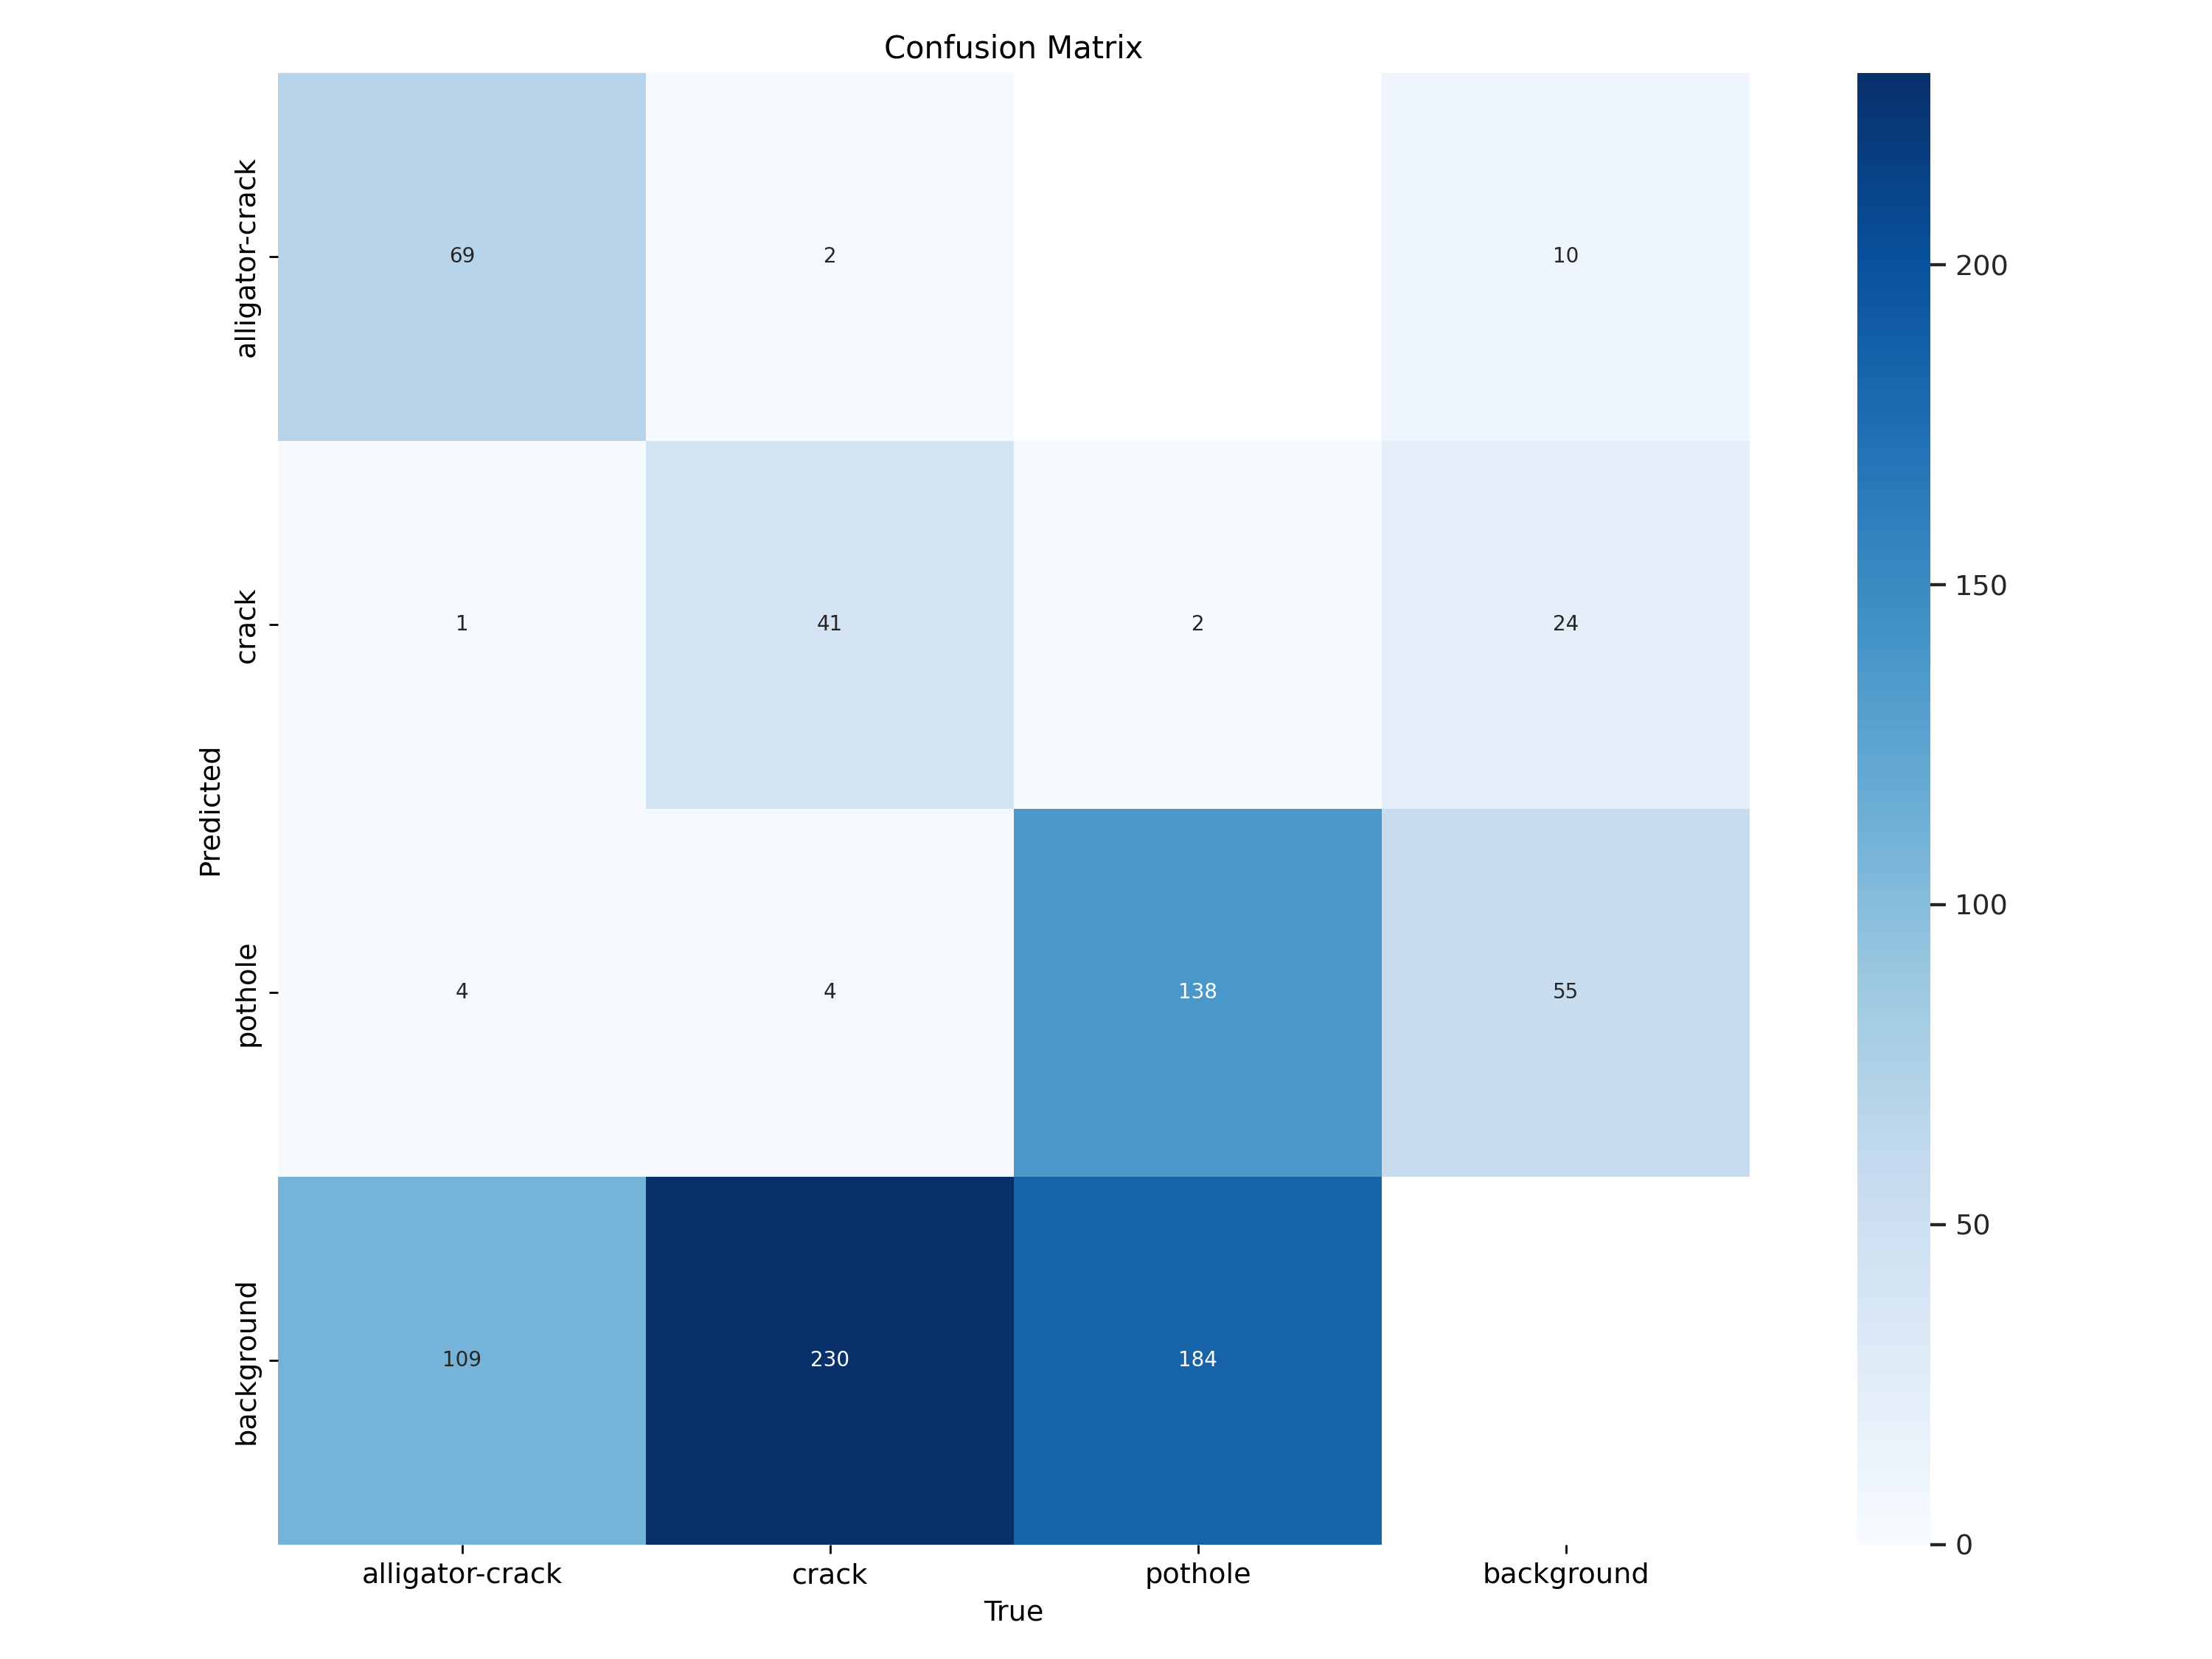

In [18]:
%cd {HOME}
Image(filename=f'/home/rishit/MajorProject/AI-Based-Road-Inspection-System/runs/detect/train/confusion_matrix.png', width=600)

/home/rishit/MajorProject/AI-Based-Road-Inspection-System/src/results/YOLOv8


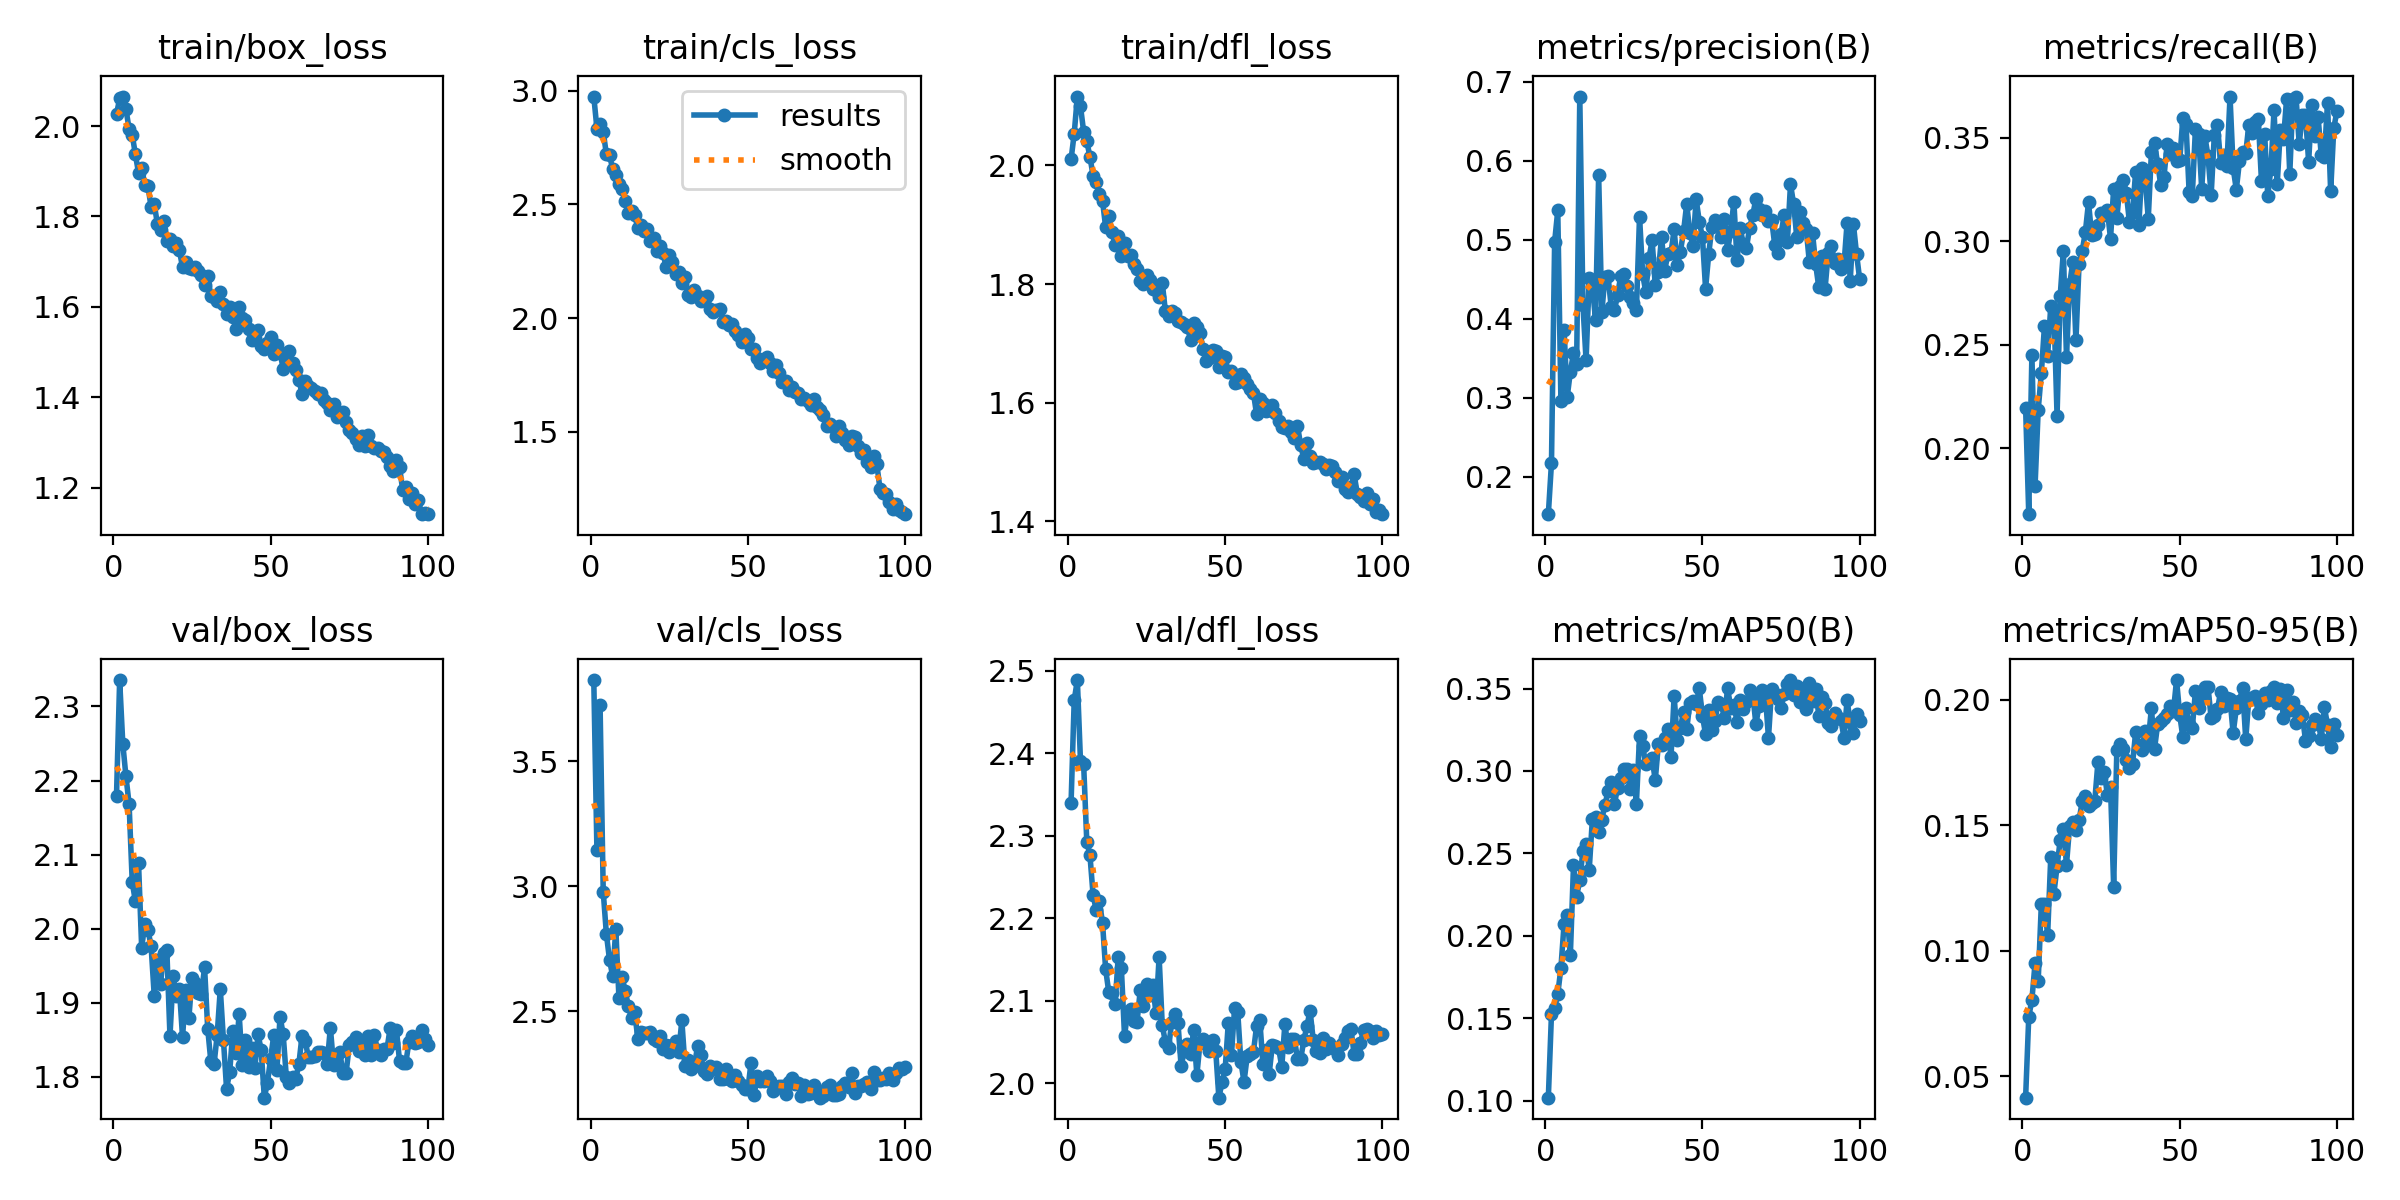

In [19]:
%cd {HOME}
Image(filename=f'/home/rishit/MajorProject/AI-Based-Road-Inspection-System/runs/detect/train/results.png', width=600)

/home/rishit/MajorProject/AI-Based-Road-Inspection-System/src/results/YOLOv8


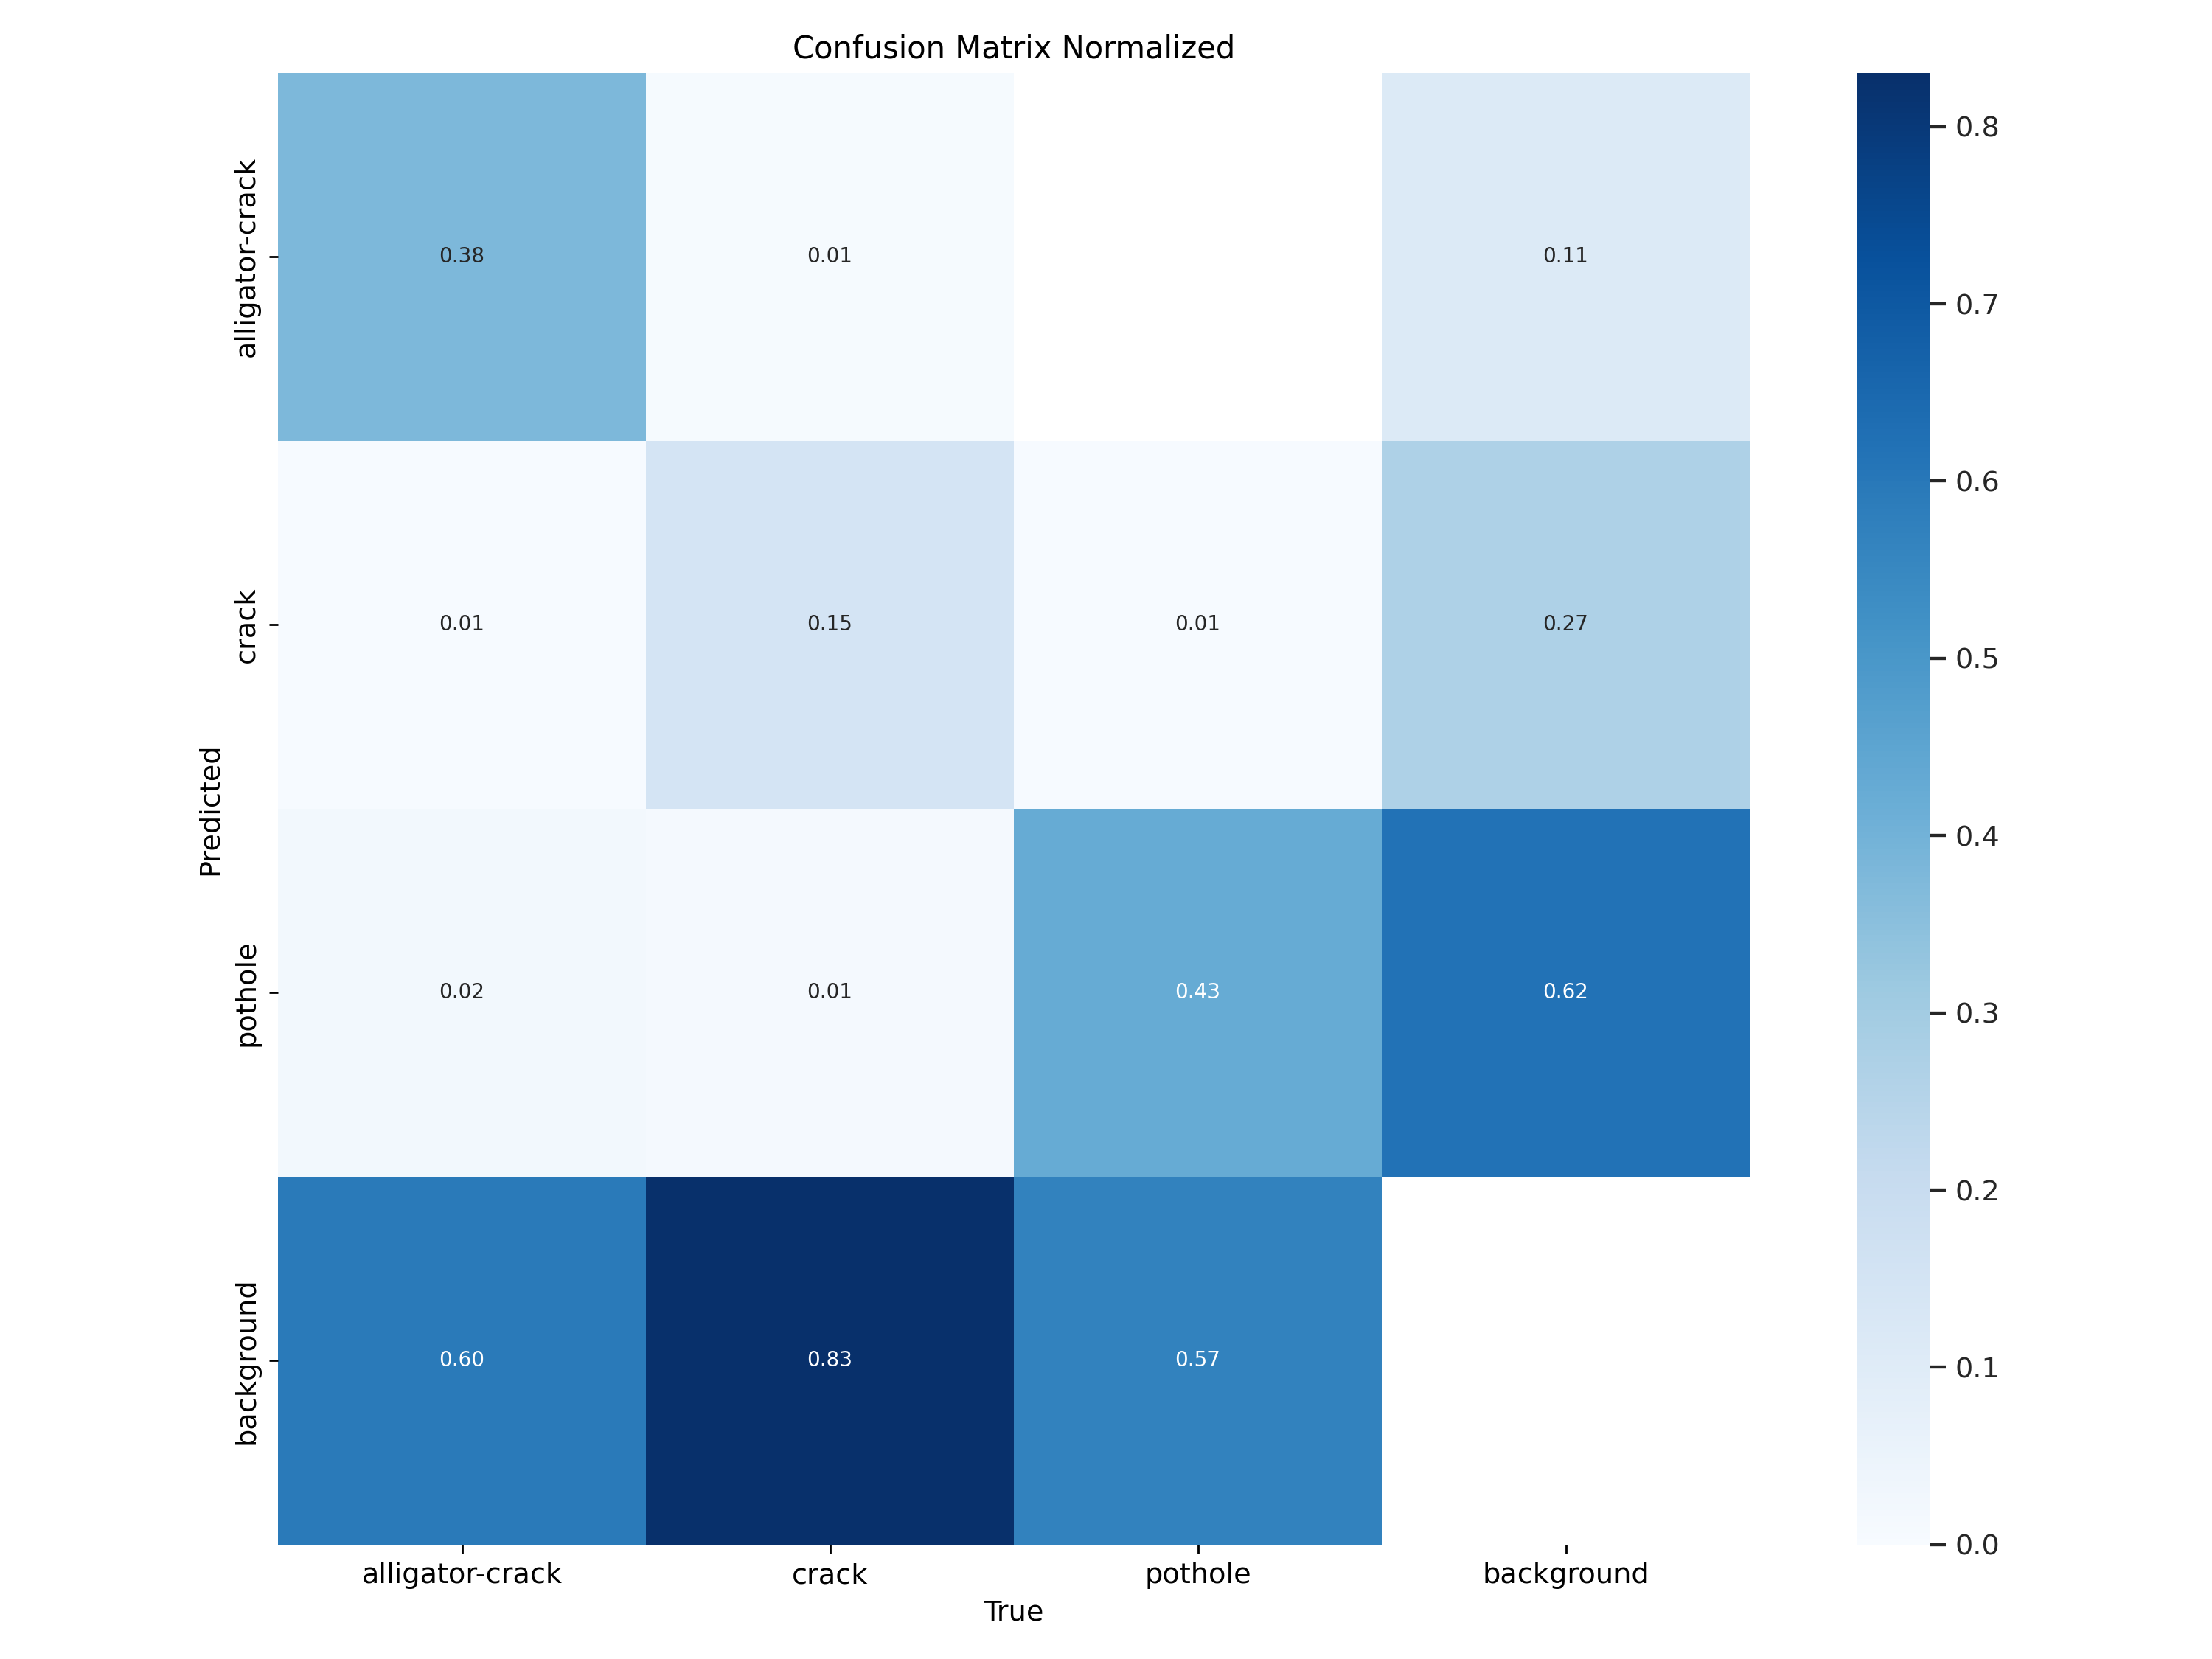

In [20]:
%cd {HOME}
Image(filename=f'/home/rishit/MajorProject/AI-Based-Road-Inspection-System/runs/detect/train/confusion_matrix_normalized.png', width=600)

/home/rishit/MajorProject/AI-Based-Road-Inspection-System/src/results/YOLOv8


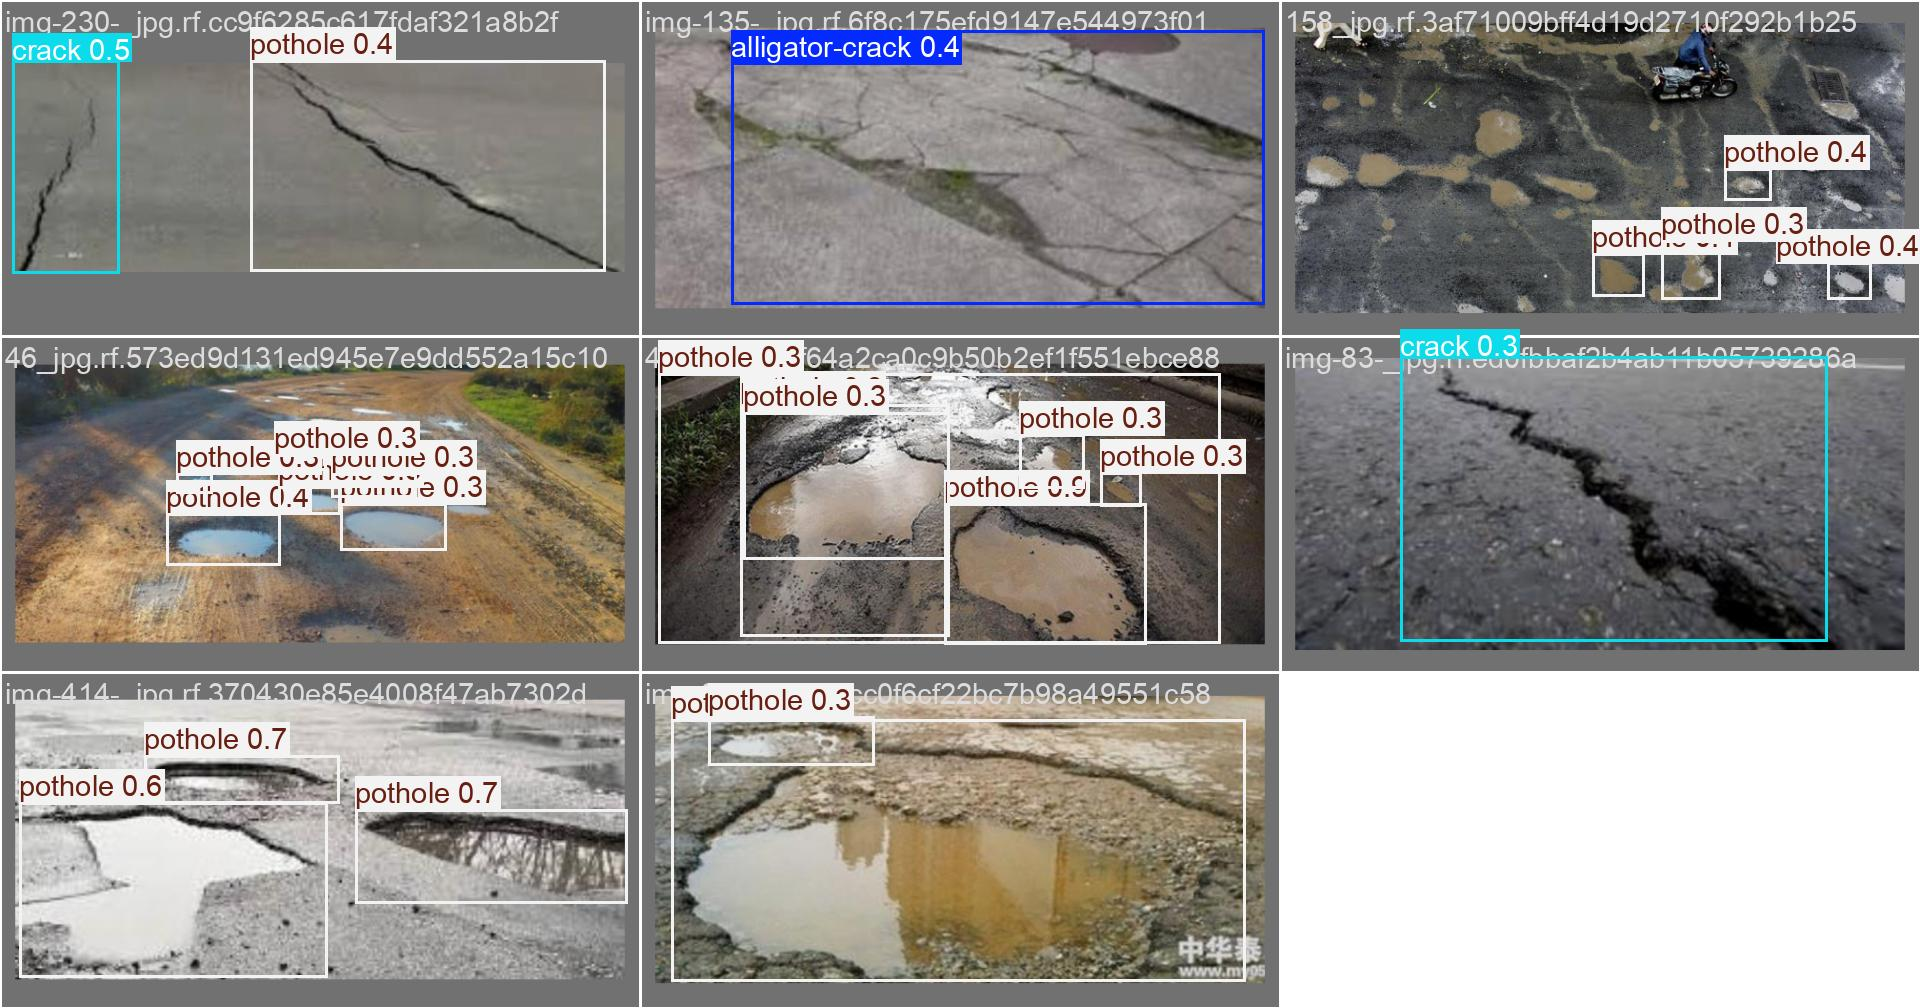

In [21]:
%cd {HOME}
Image(filename=f'/home/rishit/MajorProject/AI-Based-Road-Inspection-System/runs/detect/train/val_batch0_pred.jpg', width=1000)

**Running the model on Validation Dataset**

In [22]:
%cd {HOME}
!yolo task=detect mode=val model=/home/rishit/MajorProject/AI-Based-Road-Inspection-System/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/home/rishit/MajorProject/AI-Based-Road-Inspection-System/src/results/YOLOv8
Ultralytics 8.3.39 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /home/rishit/MajorProject/AI-Based-Road-Inspection-System/src/resu
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 784. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        279        784      0.523      0.339      0.348      0.207
       alligator-crack        128        183      0.612      0.355      0.372      0.292
                 crack        114        277      0.394      0.206      0.194     0.0885
               pothole        112 

**Running the model on Test Dataset**

In [24]:
%cd {HOME}
!yolo task=detect mode=predict model=/home/rishit/MajorProject/AI-Based-Road-Inspection-System/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/home/rishit/MajorProject/AI-Based-Road-Inspection-System/src/results/YOLOv8
Ultralytics 8.3.39 🚀 Python-3.12.3 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/207 /home/rishit/MajorProject/AI-Based-Road-Inspection-System/src/results/YOLOv8/Detection2-8/test/images/104_jpg.rf.1e215edb90f826face45aefcdc820596.jpg: 640x640 3 potholes, 13.5ms
image 2/207 /home/rishit/MajorProject/AI-Based-Road-Inspection-System/src/results/YOLOv8/Detection2-8/test/images/126_jpg.rf.3e08cbd0bb1954169a0399e0dc76d0f5.jpg: 480x640 3 alligator-cracks, 1 pothole, 47.8ms
image 3/207 /home/rishit/MajorProject/AI-Based-Road-Inspection-System/src/results/YOLOv8/Detection2-8/test/images/128_jpg.rf.680aee72f715b5e2c99dfa9f81a44fe9.jpg: 416x640 1 pothole, 44.1ms
image 4/207 /home/rishit/MajorProject/AI-Based-Road-Inspection-System/src/results/YOLOv8/Detection2-8/test/images/130_jpg.rf.2977a1e39cc92e56ad85

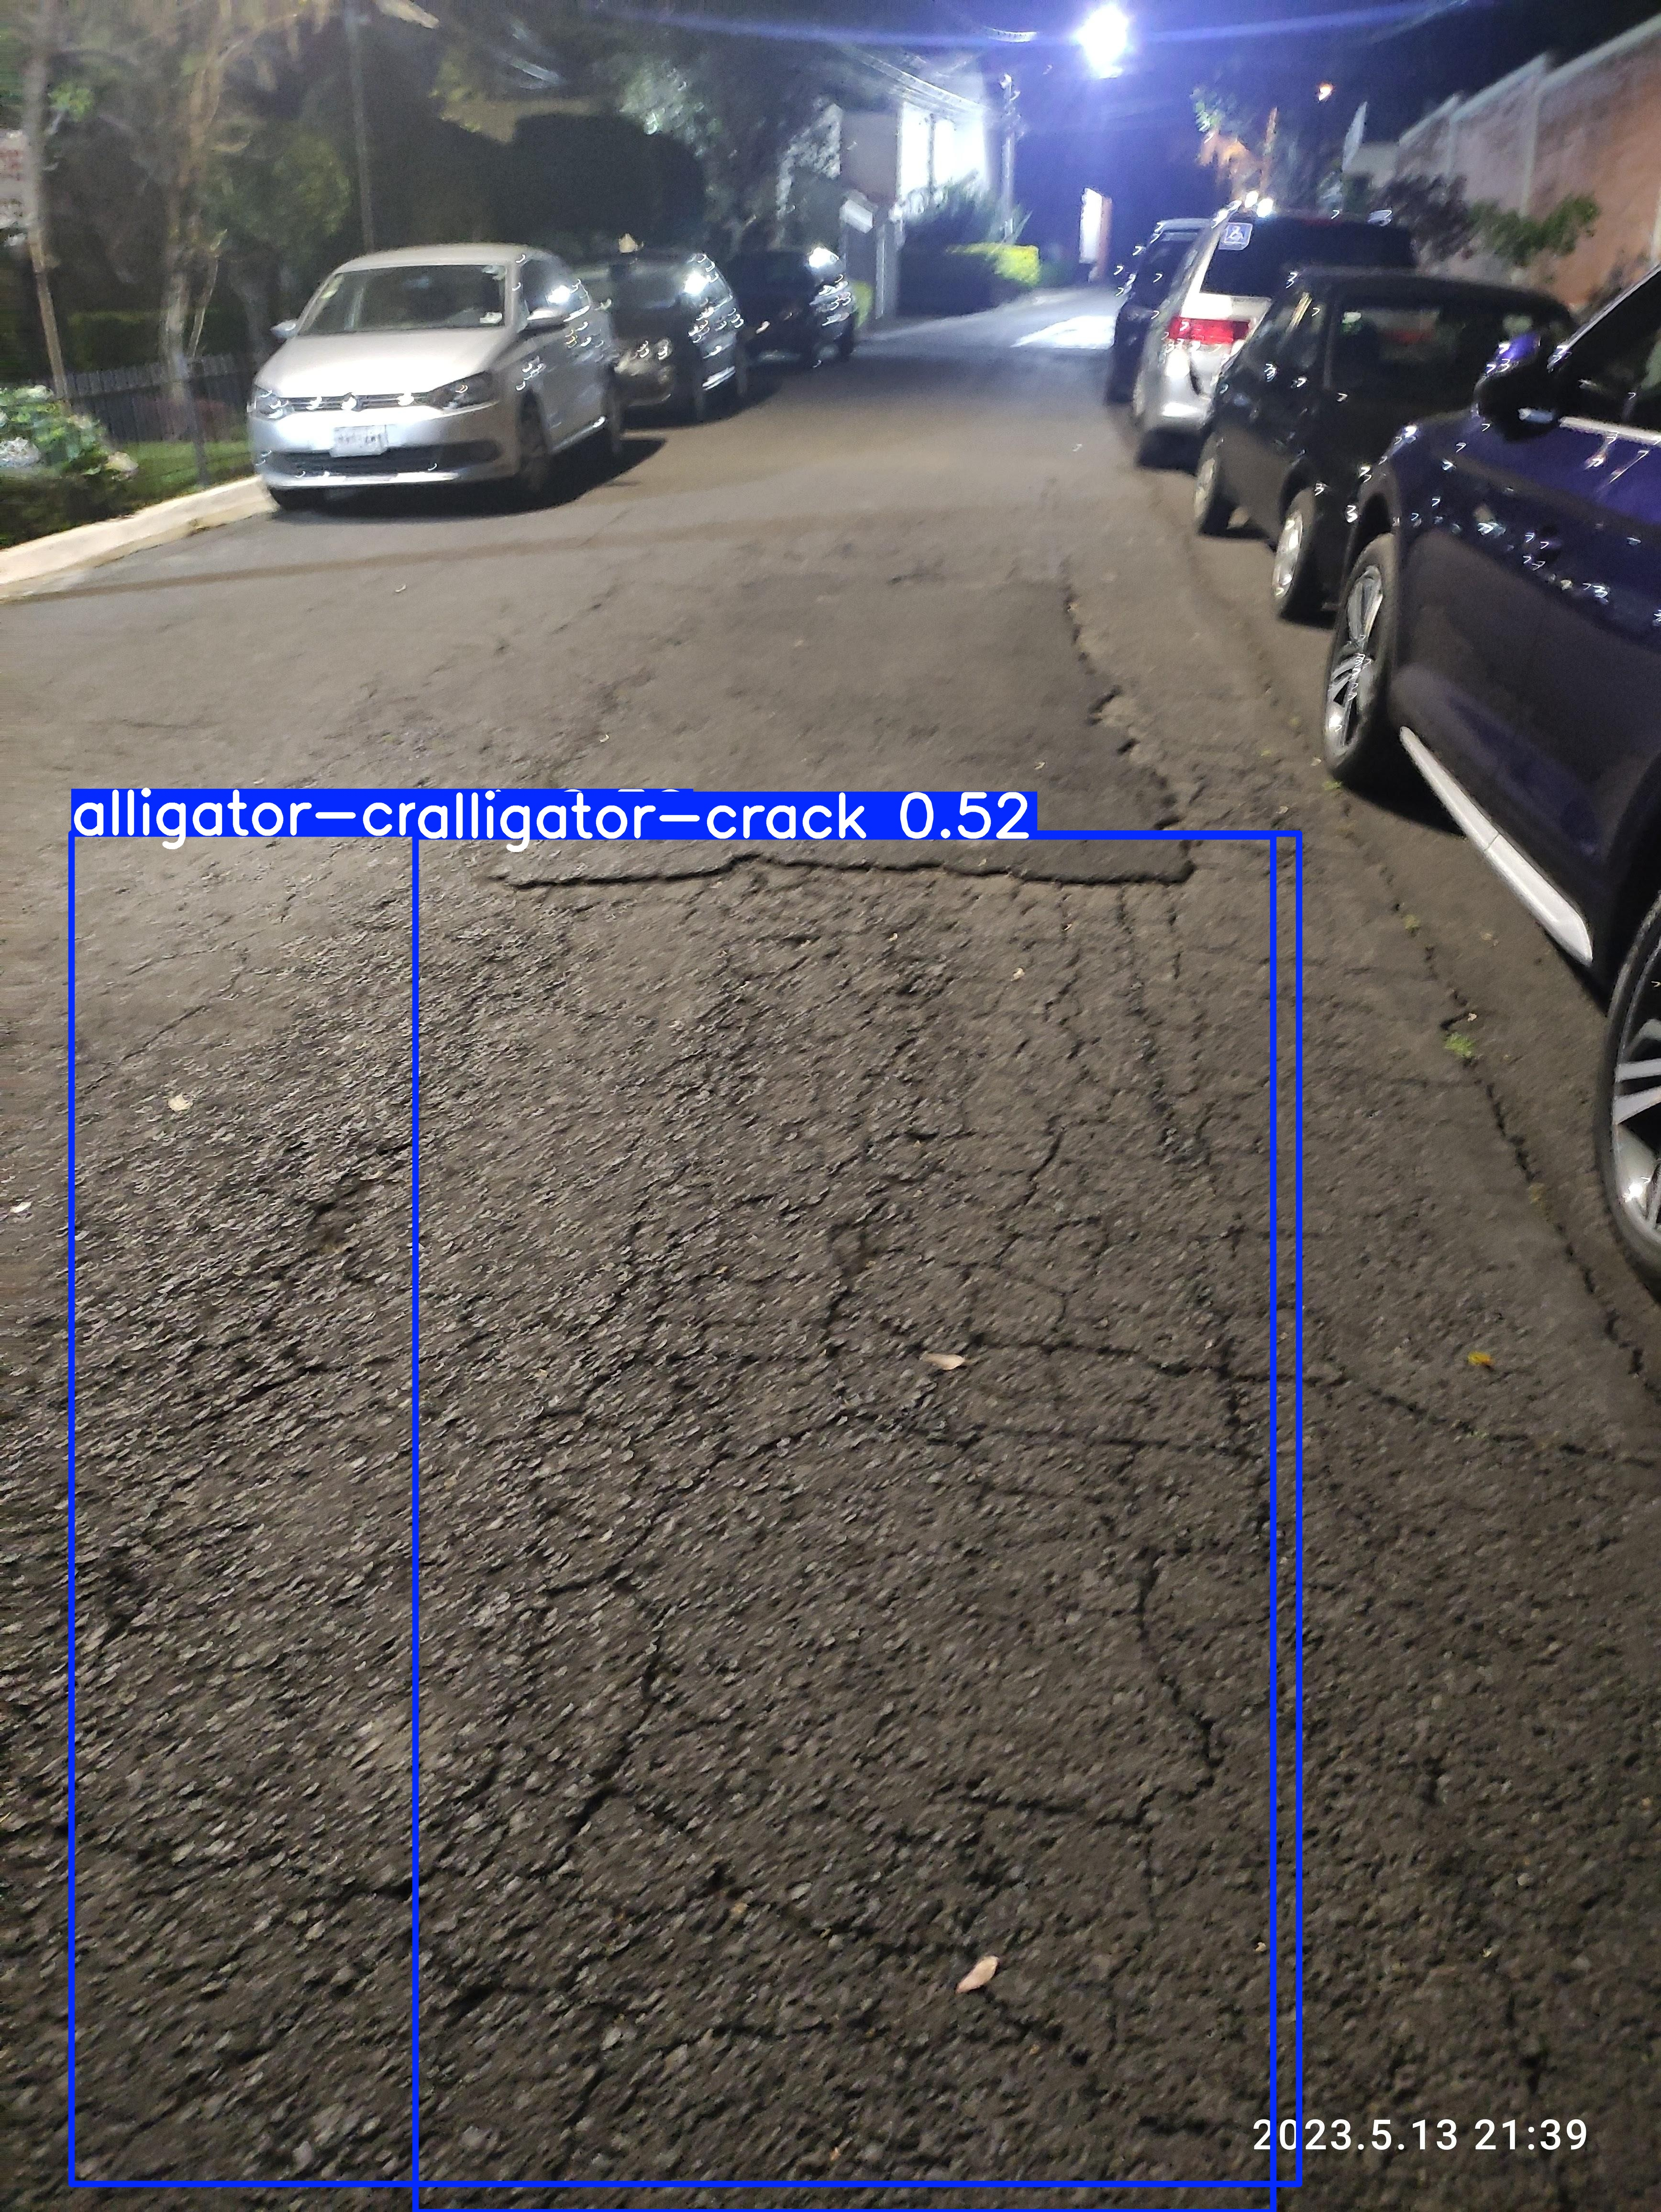

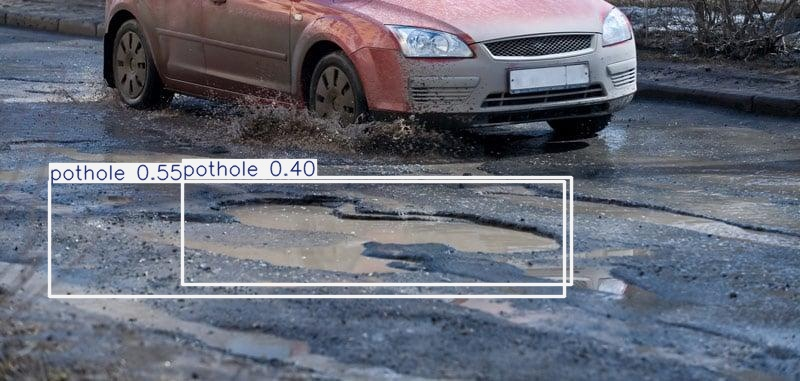

In [25]:
import glob
from IPython.display import Image, display
for  image_path in glob.glob(f'/home/rishit/MajorProject/AI-Based-Road-Inspection-System/runs/detect/predict/*.jpg')[:2]:
  display(Image(filename=image_path,width=600))
  print("\n")